### FORMA 1 - GRADIENT DESCENT

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import time
import os
from PIL import Image
import pandas as pd


In [2]:
X = np.arange(10)
y = np.array([ 2,2,4,2,5,7,6,9,8,10])

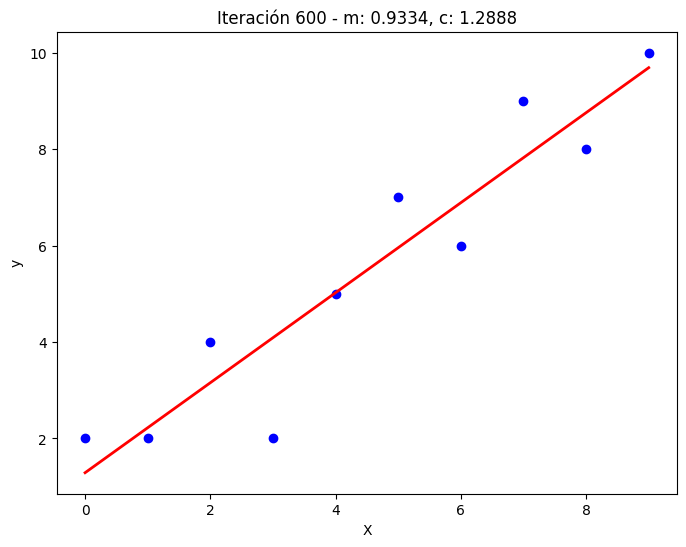


Descenso de gradiente finalizado.
Final m: 0.9334064739463076
Final c: 1.2888105422131046


In [ ]:
# 1. Inicializa los parametros m y c a cero o con valores aleatorios.
m = 0
c = 0 

# 2. Elegimos un numero de iteraciones y un learning_rate 

learning_rate = 0.01

# 3. Inicializamos valores para X e Y.
X = np.arange(10) 
y = np.array([2, 2, 4, 2, 5, 7, 6, 9, 8, 10])

# Obtener el número de muestras (n) para las derivadas
n = len(X)

# # Carpeta para guardar imágenes
folder = "imagenes"
os.makedirs(folder, exist_ok=True)

# 4. Calculamos la derivada del error respecto de m y c:for i in range(num_iteraciones):

for i in range(600):
    y_pred = m * X + c

    dm = (2/n) * np.sum((y - y_pred) * (-X)) 
    dc = (2/n) * np.sum((y - y_pred) * (-1)) 

    m = m - dm * learning_rate
    c = c - dc * learning_rate

    # === Visualizar en pantalla en cada iteración ===
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Datos Originales')
    plt.plot(X, m * X + c, color='red', linewidth=2, label='Línea de Regresión') 
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f"Iteración {i+1} - m: {m:.4f}, c: {c:.4f}") 
    clear_output(wait=True) 
    plt.show()               
    time.sleep(0.01)         
    plt.close()             

    # === Guardar imagen solo cada 20 iteraciones ===
    if i == 0 or (i + 1) % 10 == 0:
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Datos Originales')
        plt.plot(X, m * X + c, color='red', linewidth=2, label='Línea de Regresión') 
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f"Iteración {i+1} - m: {m:.4f}, c: {c:.4f}")
        plt.savefig(f"{folder}/plot_{i+1}.png")
        plt.close()        

print("\nDescenso de gradiente finalizado.")
print(f"Final m: {m}")
print(f"Final c: {c}")



In [122]:
images = []
iters_to_load = [1] + list(range(10, 601, 10)) 
durations = []

for iter_num in iters_to_load:
    filename = os.path.join(folder, f"plot_{iter_num}.png")
    if os.path.exists(filename):
        frame = Image.open(filename)
        images.append(frame)
        if iter_num <= 100:
            durations.append(200)  
        else:
            durations.append(200)  
    else:
        print(f"Archivo no encontrado: {filename}")

if images:
    images[0].save('gradiente_descenso.gif',
                   save_all=True,
                   append_images=images[1:],
                   duration=durations,
                   loop=0)
else:
    print("No hay imágenes para crear el GIF")


### FORMA 2 - ECUACION NORMAL


In [28]:
X = X.reshape(-1, 1)
# Añadir columna de unos
X_1 = np.c_[np.ones((10, 1)), X]

best_W = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)
best_W[0] # intercepto
best_W[1] # coeficiente
y_pred = best_W[0] + best_W[1] * X 
print(best_W[0],best_W[1])

1.3272727272727276 0.9272727272727272


### FORMA 3 - SKLEARN

In [79]:
X = np.arange(10).reshape(-1,1)
y = np.array([ 2,2,4,2,5,7,6,9,8,10])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X, y)

m_sklearn = lr.coef_
c_sklearn = lr.intercept_

print(m_sklearn,c_sklearn)


[0.92727273] 1.3272727272727272


In [87]:
tabla = pd.DataFrame({
    
    "Método": ["Descenso de Gradiente", "Ecuación normal","Sklearn" ],
    "m (pendiente)": [m, m_sklearn, best_W[1]],
    "c (intercepto)": [c, c_sklearn, best_W[0]]
})

tabla

,Método,m (pendiente),c (intercepto)
0,Descenso de Gradiente,0.933406,1.288811
1,Ecuación normal,[0.9272727272727274],1.327273
2,Sklearn,0.927273,1.327273
